In [2]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np
import matplotlib.patches


In [3]:
# Load the hydropower data
path = "/home/shah0012/GloHydroRes/Output_data/"
glohydrores_data = pd.read_excel(path + "glohydrores_v1.xlsx",  header = 0, sheet_name = "data")

print(glohydrores_data.head())


         ID      country                                               name  \
0  GHR00001  Afghanistan       Kajaki Hydroelectric Power Plant Afghanistan   
1  GHR00002  Afghanistan      Mahipar Hydroelectric Power Plant Afghanistan   
2  GHR00003  Afghanistan   Naghlu Dam Hydroelectric Power Plant Afghanistan   
3  GHR00004  Afghanistan  Nangarhar (Darunta) Hydroelectric Power Plant ...   
4  GHR00005  Afghanistan  Pul-e-Khumri Hydroelectric Power Plant Afghani...   

   capacity_mw  plant_lat  plant_lon plant_type  \
0       151.00    32.3220    65.1190        STO   
1        66.00    34.5560    69.4787        STO   
2       100.00    34.6410    69.7170        ROR   
3        11.55    34.4847    70.3633        STO   
4         6.00    35.9416    68.7100        ROR   

                                   plant_type_source    year plant_source  \
0  https://www.power-technology.com/data-insights...  1975.0          WRI   
1    https://globalenergyobservatory.org/geoid/40541  1967.0    

In [4]:
# To check the unique values of the plant type
print(glohydrores_data["plant_type"].unique())

['STO' 'ROR' 'Canal' nan 'PS']


0         STO
1         STO
2         ROR
3         STO
4         ROR
        ...  
7770      ROR
7771      STO
7772      STO
7773    Canal
7774      STO
Name: type_1, Length: 7775, dtype: category
Categories (5, object): ['ROR' < 'STO' < 'PS' < 'Canal' < 'NA']


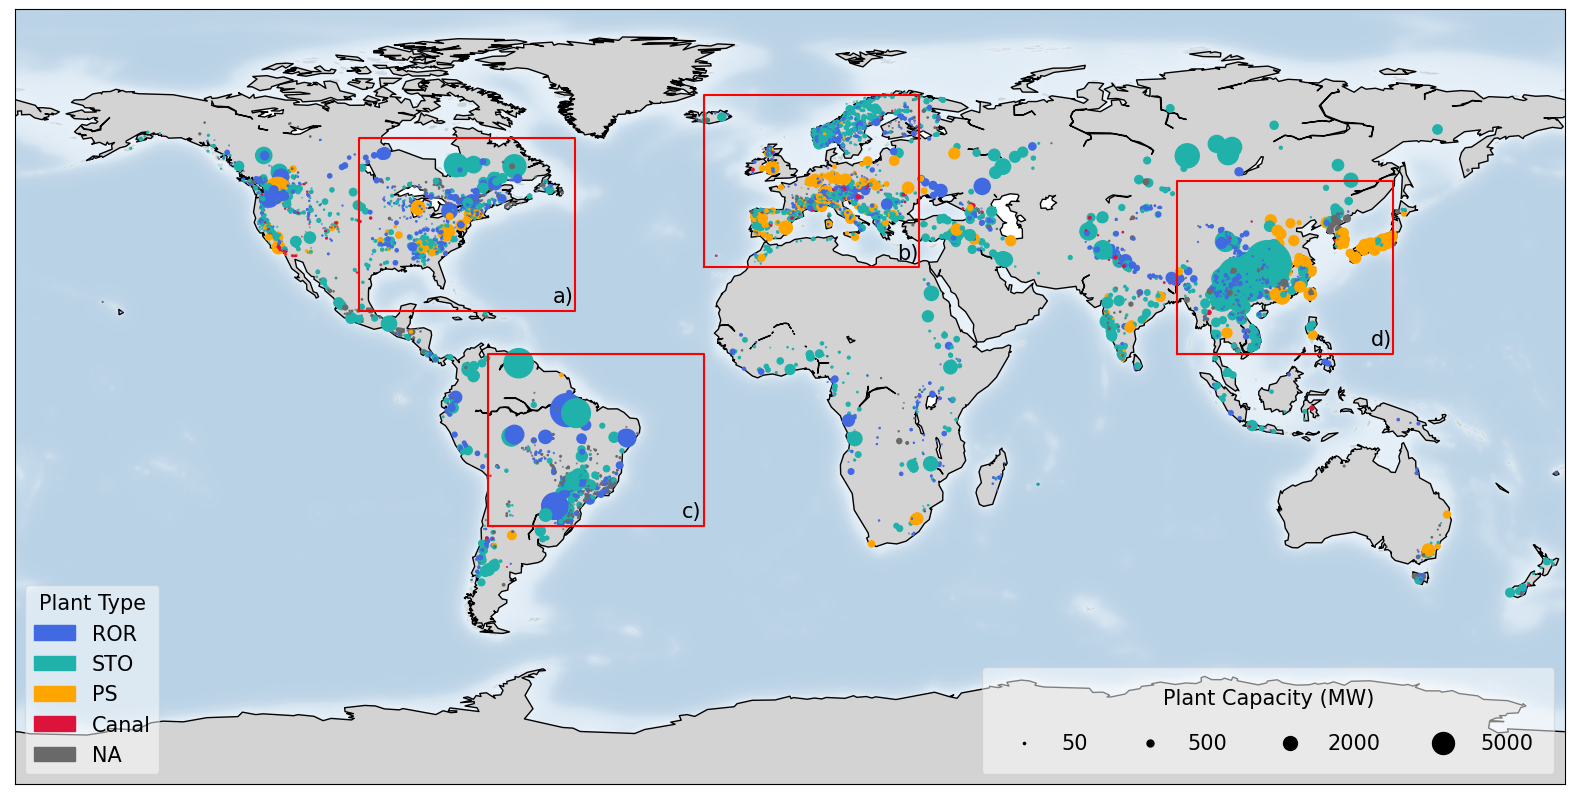

In [5]:
plant_capacity = np.array(glohydrores_data.capacity_mw)
plant_lat = np.array(glohydrores_data.plant_lat)
plant_lon = np.array(glohydrores_data.plant_lon)

glohydrores_data.plant_type[pd.isna(glohydrores_data.plant_type)] = "NA"


# Marker size will be proportional to plant capacity. Hence making marker size 0.05 times the plant capacity 
marker_size = [cap * 0.05 for cap in plant_capacity]

glohydrores_data["type_1"] = pd.Categorical(glohydrores_data["plant_type"], categories = ['ROR', 'STO', 'PS', 'Canal', 'NA'], ordered=True)
print(glohydrores_data["type_1"])
levels = glohydrores_data["type_1"].cat.codes
categories = glohydrores_data["type_1"].cat.categories

colors = ["royalblue", "lightseagreen", "orange", "crimson", "dimgray"]
# levels, categories = pd.factorize(hydropower_data["type"])
full_colors = [colors[i] for i in levels]

handles = [
    matplotlib.patches.Patch(color=colors[i], label=c)
    for i, c in enumerate(categories)
]

fig, (ax1) = plt.subplots(1, 1, figsize=(20, 20), dpi=100)
m = Basemap(
    projection="cyl",
    llcrnrlat=-90,
    urcrnrlat=90,
    llcrnrlon=-180,
    urcrnrlon=180,
    resolution="c",
    ax=ax1,
)
m.drawcoastlines()
m.fillcontinents(color="lightgray", zorder=1)
m.shadedrelief(scale=0.2, alpha=0.5)



# USA bounding box for the map
min_lon, max_lon = -100, -50
min_lat, max_lat = 20, 60
x1, y1 = m(min_lon, min_lat)
x2, y2 = m(max_lon, min_lat)
x3, y3 = m(max_lon, max_lat)
x4, y4 = m(min_lon, max_lat)
m.plot([x1, x2, x3, x4, x1], [y1, y2, y3, y4, y1], marker=None, color="r", zorder=6)

USA_lon = max_lon - 5
USA_lat = min_lat + 2
USA_cord = m(USA_lon, USA_lat)
ax1.annotate("a)", xy=USA_cord, fontsize=15)


# Europe bounding box for the map
min_lon, max_lon = -20, 30
min_lat, max_lat = 30, 70
x1, y1 = m(min_lon, min_lat)
x2, y2 = m(max_lon, min_lat)
x3, y3 = m(max_lon, max_lat)
x4, y4 = m(min_lon, max_lat)
m.plot([x1, x2, x3, x4, x1], [y1, y2, y3, y4, y1], marker=None, color="r", zorder=6)

Eur_lon = max_lon - 5
Eur_lat = min_lat + 2
Eur_cord = m(Eur_lon, Eur_lat)
ax1.annotate("b)", xy=Eur_cord, fontsize=15)


# South America bounding box for the map
min_lon, max_lon = -70, -20
min_lat, max_lat = -30, 10
x1, y1 = m(min_lon, min_lat)
x2, y2 = m(max_lon, min_lat)
x3, y3 = m(max_lon, max_lat)
x4, y4 = m(min_lon, max_lat)
m.plot([x1, x2, x3, x4, x1], [y1, y2, y3, y4, y1], marker=None, color="r", zorder=6)

SA_lon = max_lon - 5
SA_lat = min_lat + 2
SA_cord = m(SA_lon, SA_lat)
ax1.annotate("c)", xy=SA_cord, fontsize=15)


# China bounding box for the map
min_lon, max_lon = 90, 140
min_lat, max_lat = 10, 50
x1, y1 = m(min_lon, min_lat)
x2, y2 = m(max_lon, min_lat)
x3, y3 = m(max_lon, max_lat)
x4, y4 = m(min_lon, max_lat)
m.plot([x1, x2, x3, x4, x1], [y1, y2, y3, y4, y1], marker=None, color="r", zorder=6)


China_lon = max_lon - 5
China_lat = min_lat + 2
China_cord = m(China_lon, China_lat)
ax1.annotate("d)", xy=China_cord, fontsize=15)



pos = ax1.scatter(plant_lon, plant_lat, s=marker_size, c= full_colors, zorder=5)
lgd = ax1.legend(handles=handles, title="Plant Type", framealpha = 0.5, prop={'size': 15}, loc = "lower left")
lgd.get_title().set_fontsize('15') #legend 'Title' fontsize

# Make a legend for popdensity. Hand-wavy. Error prone!
pws = (pd.cut(plant_capacity, bins=[50, 500, 2000, 5000], retbins=True)[1]).round(0)
for pw in pws:
    plt.scatter([], [], s=pw*0.05, c="k",label=str(pw))

h, l = plt.gca().get_legend_handles_labels()
#order = [2, 0, 4, 3, 1]
lgd1 = plt.legend(h[0:], l[0:], labelspacing=1.2, title="Plant Capacity (MW)", borderpad=1, 
            frameon=True, framealpha = 0.5,  loc=4, numpoints=1,  prop={'size': 15}, ncol=4)

lgd1.get_title().set_fontsize('15') #legend 'Title' fontsize

plt.gca().add_artist(lgd)
plt.savefig(
     "/home/shah0012/GloHydroRes/Figure/hydropower_plant_distribution_attr_plant_type_capacity.png",
     bbox_inches="tight",
 )


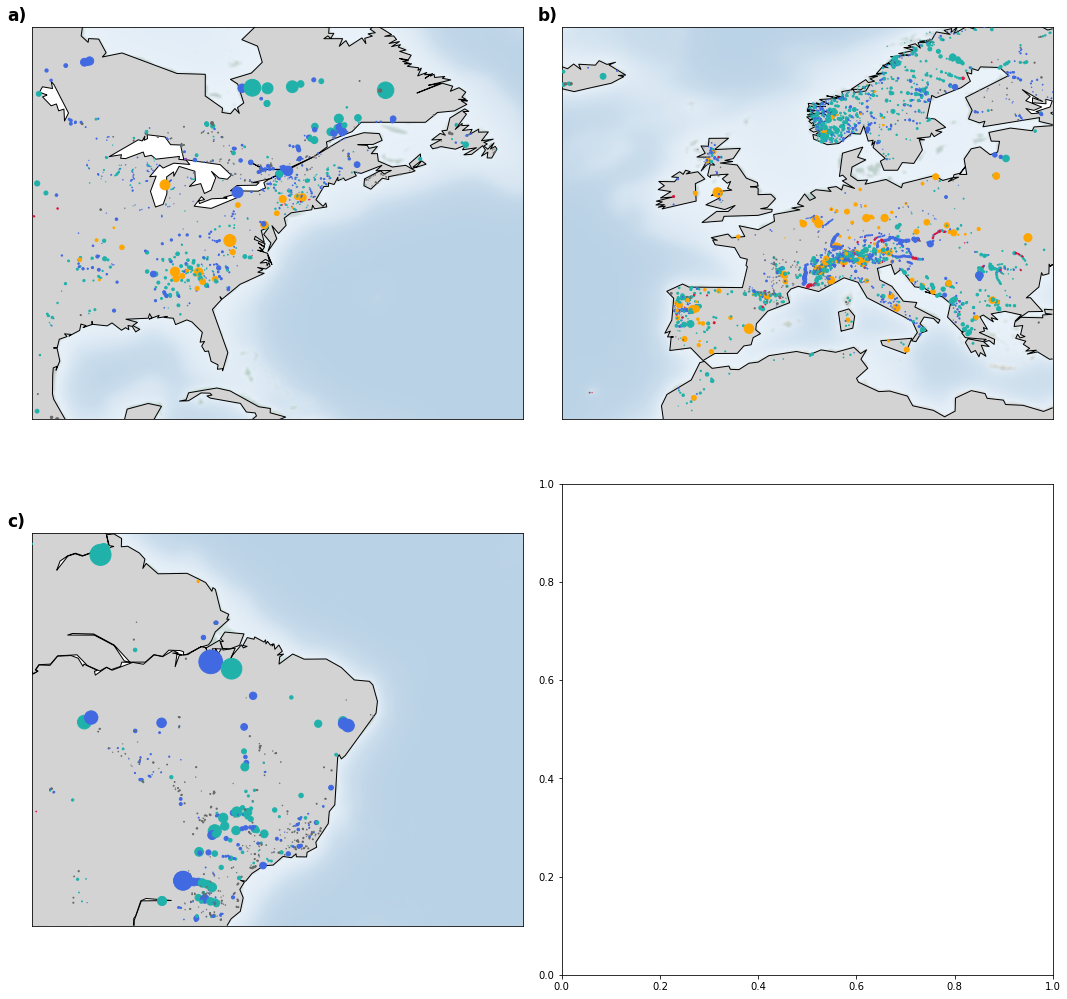

In [6]:
fig, axes = plt.subplots(2, 2, figsize=[15,15])

# For USA
m = Basemap(
    projection="cyl",
    llcrnrlat=20,
    urcrnrlat=60,
    llcrnrlon=-100,
    urcrnrlon=-50,
    resolution="c",
    ax=axes[0,0],
)
m.drawcoastlines()
m.fillcontinents(color="lightgray", zorder=1)
m.shadedrelief(scale=0.2, alpha=0.5)



pos = axes[0,0].scatter(plant_lon, plant_lat, s=marker_size, c= full_colors, zorder=5)



# For Europe
m = Basemap(
    projection="cyl",
    llcrnrlat=30,
    urcrnrlat=70,
    llcrnrlon=-20,
    urcrnrlon=30,
    resolution="c",
    ax=axes[0,1],
)
m.drawcoastlines()
m.fillcontinents(color="lightgray", zorder=1)
m.shadedrelief(scale=0.2, alpha=0.5)

pos_1 = axes[0,1].scatter(plant_lon, plant_lat, s=marker_size, c= full_colors, zorder=5)



# For South America
m = Basemap(
    projection="cyl",
    llcrnrlat=-30,
    urcrnrlat=10,
    llcrnrlon=-70,
    urcrnrlon=-20,
    resolution="c",
    ax=axes[1,0],
)
m.drawcoastlines()
m.fillcontinents(color="lightgray", zorder=1)
m.shadedrelief(scale=0.2, alpha=0.5)

pos_1 = axes[1,0].scatter(plant_lon, plant_lat, s=marker_size, c= full_colors, zorder=5)

# For China
m = Basemap(
    projection="cyl",
    llcrnrlat=10,
    urcrnrlat=50,
    llcrnrlon=90,
    urcrnrlon=140,
    resolution="c",
    ax=axes[1,1],
)
m.drawcoastlines()
m.fillcontinents(color="lightgray", zorder=1)
m.shadedrelief(scale=0.2, alpha=0.5)

pos_1 = axes[1,1].scatter(plant_lon, plant_lat, s=marker_size, c= full_colors, zorder=5)

labels = ['a)', 'b)', 'c)', 'd)']
for ax, label in zip(axes.flatten(), labels):
    # Add the label
    ax.text(-0.05, 1.05, label, transform=ax.transAxes, fontsize=17, verticalalignment='top', weight='bold')

plt.tight_layout(pad=2);

#plt.show()
plt.savefig(
     "/home/shah0012/GloHydroRes/Figure/regional_hydropower_plant_distribution_attr_plant_type_capacity.png",
     bbox_inches="tight",
 )
plt.cla()